In [12]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.models import load_model

from IPython.display import SVG,display
from keras.utils.vis_utils import model_to_dot

batch_size = 32
num_classes = 11
epochs = 3

In [2]:
def hot(y):
    label_binarizer = LabelBinarizer()
    label_binarizer.fit(range(11))
    new_y = np.zeros((y.shape[0],y.shape[1]*num_classes))
    for i in range(len(y)):
        new_y[i,:] = label_binarizer.transform(y[i]).flatten()
    return new_y

In [3]:
X = np.load("resizecrop.npy")
y = np.load("nummertrain.npy").astype(int)

In [4]:
y = hot(y)
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

In [14]:
y1,y2,y3,y4,y5,ynum = y_train[:,0:11],y_train[:,11:22],y_train[:,22:33],y_train[:,33:44],y_train[:,44:55],y_train[:,55:66]
y1_t,y2_t,y3_t,y4_t,y5_t,ynum_t = y_test[:,0:11],y_test[:,11:22],y_test[:,22:33],y_test[:,33:44],y_test[:,44:55],y_test[:,55:66]
print('x_train shape:', x_train.shape)
print('y_train shape:', ynum.shape)
print(x_train.shape[0], 'train samples')

x_train shape: (26721, 25, 23, 3)
y_train shape: (26721, 11)
26721 train samples


In [6]:
digit1 = load_model('digit1.h5')
digit1.name ="digit1"

digit2 = load_model('digit2.h5')
digit2.name ="digit2"

digit3 = load_model('digit3.h5')
digit3.name ="digit3"

digit4 = load_model('digit4.h5')
digit4.name ="digit4"

digit5 = load_model('digit5.h5')
digit5.name ="digit5"

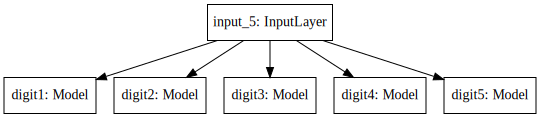

In [11]:
a = Input(shape=x_train.shape[1:])

# Number tower
d1 = digit1(a)

d2 = digit2(a)

d3 = digit3(a)

d4 = digit4(a)

d5 = digit5(a)

model = Model(inputs=a, outputs=[d1, d2, d3, d4, d5])

display(SVG(model_to_dot(model).create(prog='dot', format='svg')))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [ ]:
model.fit(x_train,[y1,y2,y3,y4,y5],
        batch_size=batch_size,
        epochs=epochs,
        validation_split=0.2,
        shuffle=True,
        verbose=2)

Train on 21376 samples, validate on 5345 samples
Epoch 1/3
